# 04. 카운트 기반의 단어 표현(Count based word Representation)

## 04-01 다양한 단어의 표현 방법

### 1. 단어의 표현 방법
- 국소 표현 방법: 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법
- 분산 표현 방법: 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법

### 2. 단어 표현의 카테고리화
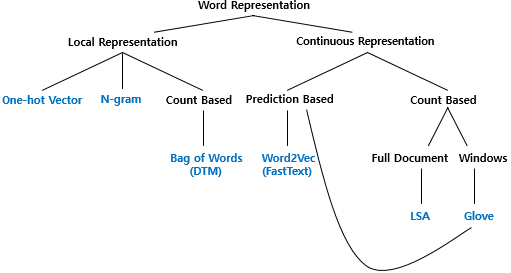
-  Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법
- TF-IDF: 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있음
- 워드투벡터: 연속 표현(Continuous Representation)에 속하면서, 예측(prediction)을 기반으로 단어의 뉘앙스를 표현
- 패스트텍스트: 워드투벡터의 확장
- 글로브: 예측과 카운트라는 두 가지 방법이 모두 사용

## 04-02 Bag of Words(BoW)

### 1. Bag of Words란?
- 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

#### 문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.


In [1]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:  
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)  
            # BoW에 전부 기본값 1을 넣는다.
            bow.insert(len(word_to_index) - 1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
            bow[index] = bow[index] + 1

    return word_to_index, bow

In [2]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


- '가'와 '물가상승률'이 두번씩 언급되었기 때문에 인덱스 1과 4의 값은 2

### 2. Bag of Words의 다른 예제들

#### 문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

In [3]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


#### 문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

In [4]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


- 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰임
  - '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 분류
  - '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류

### 3. CountVectorizer 클래스로 BoW 만들기
- 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


- 'I'가 사라진 이유 -> CountVectorizer가 기본적으로 길이가 2 이상인 문자만 토큰으로 인식하기 때문에
- 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음
-  CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단

### 4. 불용어를 제거한 BoW 만들기

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### (1) 사용자가 직접 정의한 불용어 사용

In [7]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


#### (2) CountVectorizer에서 제공하는 자체 불용어 사용

In [8]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


#### (3) NLTK에서 지원하는 불용어 사용

In [9]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## 04-03 문서 단어 행렬(Document-Term Matrix, DTM)

### 1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법
- 문서 단어 행렬: 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
- 쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것
- BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어

>문서1 : 먹고 싶은 사과<br>
문서2 : 먹고 싶은 바나나<br>
문서3 : 길고 노란 바나나 바나나<br>
문서4 : 저는 과일이 좋아요

|공란|과일이|길고|노란|먹고|바나나|사과|싶은|저는|좋아요|
|---|---|---|---|---|---|---|---|---|---|
|문서1|0|0|0|1|0|1|1|0|0|
|문서2|0|0|0|1|1|0|1|0|0|
|문서3|0|1|1|0|2|0|0|0|0|
|문서4|1|0|0|0|0|0|0|1|1|

- 각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기
- 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 가짐

### 2. 문서 단어 행렬(Document-Term Matrix)의 한계
#### (1) 희소 표현(Sparse representation)
- 원-핫 벡터: 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 되는 벡터
- 공간적 낭비와 계산 리소스를 증가시킬 수 있다
- 희소 벡터(sparse vector), 희소 행렬(sparse matrix): 원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현
- 많은 양의 저장 공간과 높은 계산 복잡도를 요구

#### (2) 단순 빈도 수 기반 접근
- 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장
- the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됨
- TF-IDF: DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법

## 04-04 TF-IDF(Term Frequency-Inverse Document Frequency)
- TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교 가능
- 항상 좋은 성능을 보장하는 것은 아니지만, 많은 경우에서 DTM보다 더 좋은 성능

### 1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
- TF-IDF(Term Frequency-Inverse Document Frequency): 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
- 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰임
- TF-IDF는 TF와 IDF를 곱한 값을 의미
  - 문서: d
  - 단어: t
  - 문서의 개수: n

#### (1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
- TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값
#### (2) df(t) : 특정 단어 t가 등장한 문서의 수.
- 몇번 문서에서 몇번 나왔는지 상관없이 오직 특정 단어 t가 등장한 문서의 수에만 관심
#### (3) idf(d, t) : df(t)에 반비례하는 수.
$$idf(d, t) = log(\frac{n}{1+df(t)})$$
- DF의 역수
- 식에 log를 취하는 이유: IDF를 DF의 역수로 사용한다면 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지기 때문에
- 식에 분모에 1을 더해주는 이유: 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함
- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단
  - ex) a, the...
- 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단
- TF-IDF 값이 낮으면 중요도가 낮고, TF-IDF 값이 크면 중요도가 크다


### 2. 파이썬으로 TF-IDF 직접 구현하기

In [10]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [11]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [12]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [13]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [14]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


- 사실 실제 TF-IDF 구현을 제공하고 있는 많은 머신 러닝 패키지들은 패키지마다 식이 조금씩 상이하지만, 위에서 배운 식과는 다른 조정된 식을 사용
- 몇 가지 문제점
  - $n$이 4일때 $df(t)$의 값이 3인 경우, $df(t)$에 1이 더해지면서 log의 분모와 분자가 같아지고 log의 진수값이 1이되면서 $idf(d,t)$가 0이 되는 경우가 생길 수도 있음
  - IDF의 값이 0이라면 더 이상 가중치의 역할을 수행 불가
  
### 3. 사이킷런을 이용한 DTM과 TF-IDF 실습

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
